In [1]:
import os

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

sns.set(context="paper", style="darkgrid", palette="deep", color_codes=True, font="serif")

In [2]:
params = {
    'axes': {
        'labelcolor': '#000000',
        'labelsize': 'medium'
    },
    'figure': {
        'autolayout': True,
        'figsize': [4.5, 2.5],
        'titlesize': 'x-large'
    },
    'legend': {
        'fontsize': 10,
        'labelspacing': .1,
        'handlelength': 1.5
    },
    'text': {
        'usetex': True,
        'latex.unicode': True,
        'latex.preamble': [
            r"\usepackage[utf8x]{inputenc}",
            r"\usepackage[T1]{fontenc}",
            r"\usepackage[portuguese]{babel}"
        ]
    },
    'xtick': {
        'color': 'dimgray',
        'bottom': True,
        'minor.visible': True
    },
    'ytick': {
        'color': 'dimgray',
        'left': True,
        'minor.visible': True
    }
}

for group, options in params.items():
    plt.rc(group, **options)

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


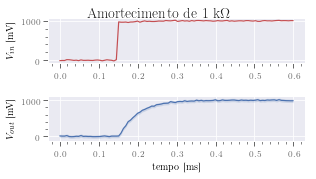

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


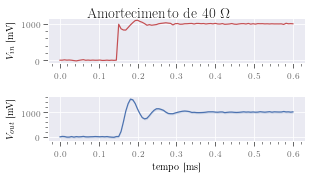

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


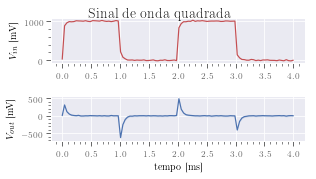

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


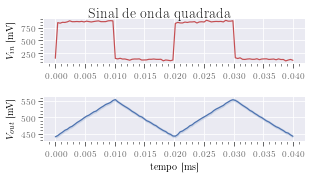

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


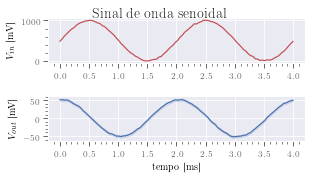

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


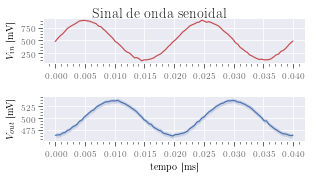

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


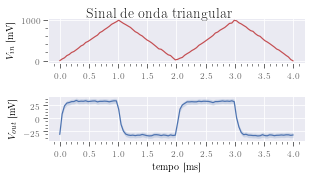

/home/marmis/.conda/envs/default/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


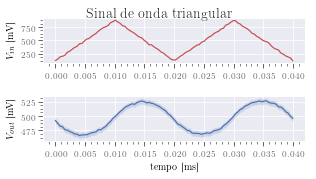

In [5]:
path = "dados/"
save_path = "figuras/parciais/plots/"
csv_list = [file for file in os.listdir(path) if file.endswith(".csv")]
csv_list.sort()

wavename = {
    "sin": "senoidal",
    "quad": "quadrada",
    "tri": "triangular",
}

damped_title = {
    "4": r"40 $\Omega$",
    "1": r"1 k$\Omega$"
}

for file in csv_list:
    if not file.endswith(".csv"):
        continue
    elif "o.csv" in file:
        title = "Amortecimento de " + damped_title[file[0]]
    else:
        title = "Sinal de onda " + wavename[file.split("_")[0]]

    dat = pd.read_csv(path + file, dtype=np.longdouble, float_precision="high")

    fig, (vin, vout) = plt.subplots(2, 1)
    fig.suptitle(title)

    sns.lineplot("t", "Vi", data=dat, ax=vin, color='r')
    sns.lineplot("t", "Vo", data=dat, ax=vout, color='b')
    plt.fill_between(dat["t"], dat["Vo"] - dat["Vor"], dat["Vo"] + dat["Vor"], alpha=.2)
    
    vin.set_ylabel("$V_{in}$ [mV]")
    vin.set_xlabel("", labelpad=0)
    vout.set_ylabel("$V_{out}$ [mV]")
    vout.set_xlabel("tempo [ms]")

    plot_file = file.replace(".csv", ".pgf")
    plt.savefig(save_path + plot_file)